# Dataset - Diabetic Retinopathy Detection
* Diabetic retinopathy is the leading cause of blindness in the working-age population of the developed world.
* This dataset provided with a large set of high-resolution retina images taken under a variety of imaging conditions. 

- Reference : https://www.kaggle.com/c/diabetic-retinopathy-detection#description



## data preparation
### image filename list
* training data
    * train_img.csv
* test data
    * test_img.csv

### label 
* training data
    * train_label.csv
* test data
    * test_label.csv
    
* class
    * 0 - No DR
    * 1 - Mild
    * 2 - Moderate
    * 3 - Severe
    * 4 - Proliferative DR

### images
* 28,099 images for training
* 7055 for testing
* The image resolution is 512x512 

* image path 
    * ex: data/2576_right.jpeg


# 1. metadata distribution

In [1]:
import pandas as pd
import os 
from PIL import Image
from numpy import asarray
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('fundus_metadata.csv', index_col=0)
df

,image_num,img_dir,label
0,2576,right,0
1,6592,left,0
2,30349,right,3
3,1741,right,0
4,33869,left,0
...,...,...,...
28095,2290,left,0
28096,34170,right,0
28097,38060,left,0
28098,35445,right,2


Text(0, 0.5, 'Frequency')

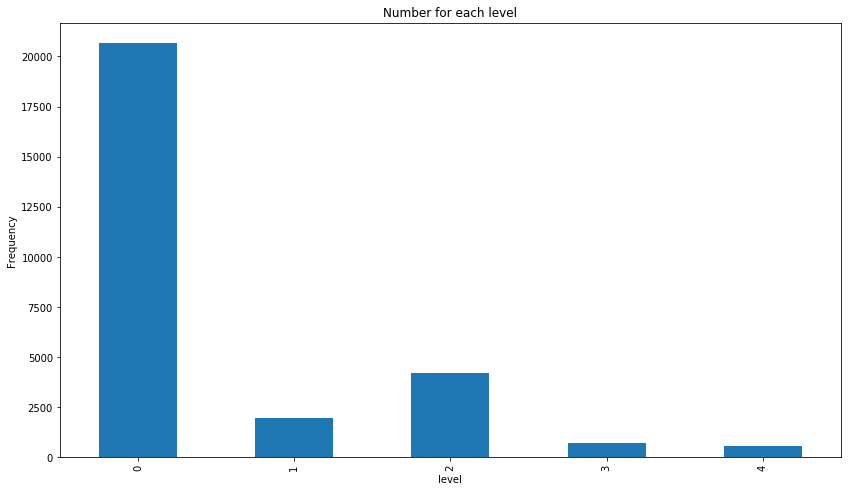

In [3]:
ax = df['label'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number for each level")
ax.set_xlabel("level")
ax.set_ylabel("Frequency")

# 2. view fundus image

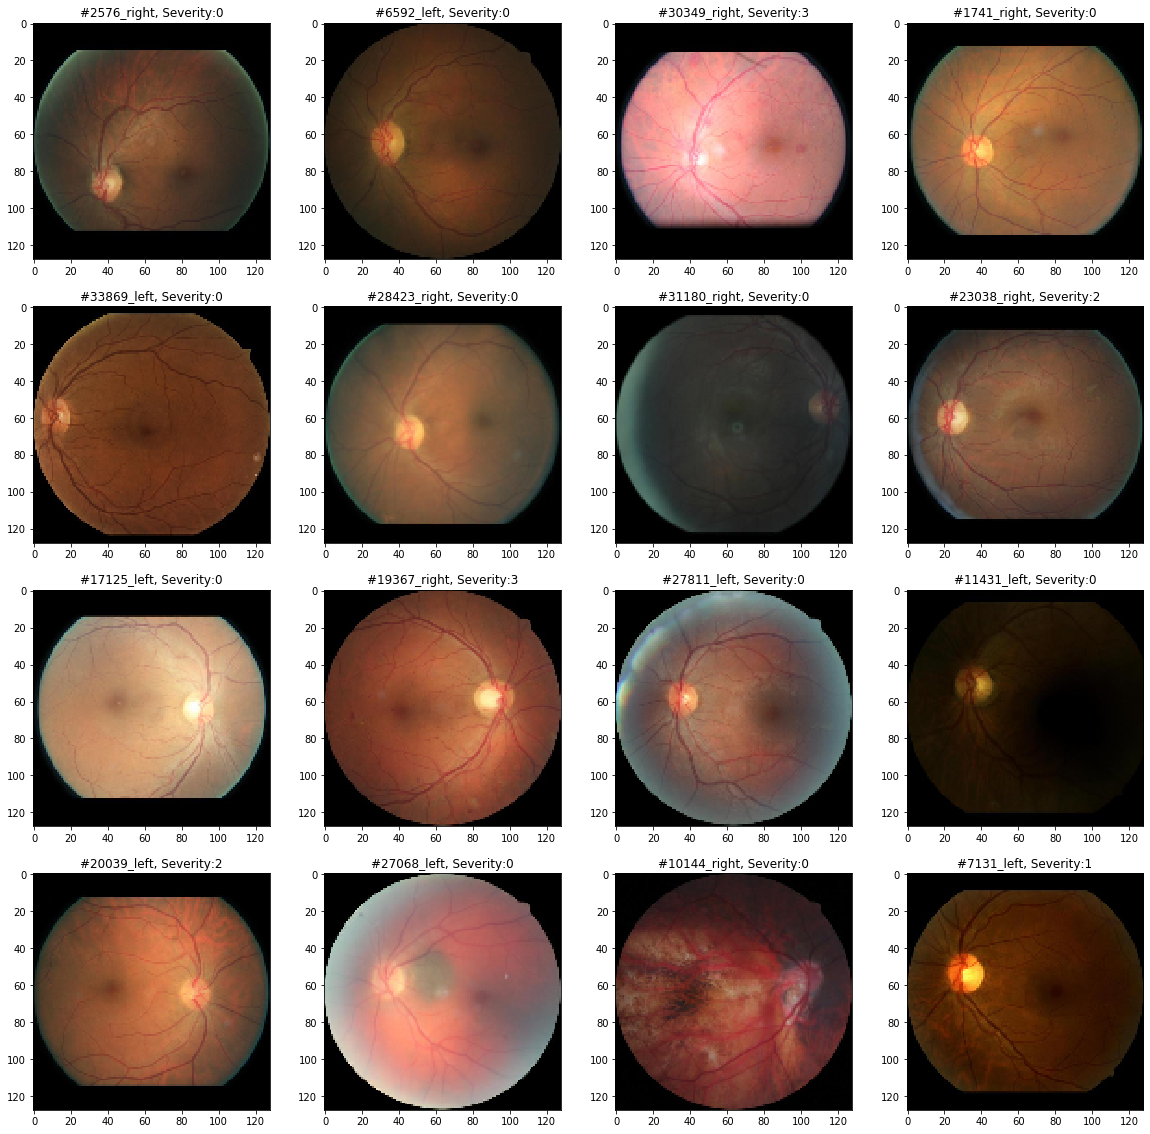

In [5]:


image_path = 'data'

fig=plt.figure(figsize=(20,20))
columns = 4
rows = 4
ax=[]
for i in range( columns*rows ):
    image_num = str(df.loc[i]['image_num'])
    img_dir = str(df.loc[i]['img_dir'])
    label = str(df.loc[i]['label'])

    image_name = os.path.join(image_path,image_num+'_'+img_dir+'.jpeg')
    image = Image.open(image_name)

    new_img = image.resize((128, 128))    
    img = np.array(new_img)
    #fig.add_subplot(rows, columns, i)
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title("#"+image_num+"_"+img_dir+", Severity:"+label)
    plt.imshow(img)
plt.show()